# Библиотеки

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import pyarrow

# Импорт

In [3]:
df = pd.read_parquet('/Users/vitaly/Documents/1_Образование/Государственное/ВШЭ/Годовой проект/Датасеты/habr_articles_parsed_final.parquet',
                     engine = 'pyarrow')

In [4]:
df.head(1)

,Title,Author,Publication_date,Hubs,Tags,Content,Comments,Views,URL,Reading_time,Images_links,Individ/Company,Rating,Positive/Negative,Bookmarks_cnt
0,Лечение приступов лени,complex,2009-08-03 14:34:35+00:00,GTD,"лень, учись работать, самомотивация, мотивация",Пора лишать девственности свой бложик.\nТак ка...,67,6800,https://habr.com/ru/articles/66091/,2.0,,individual,4,positive,25.0


# Понижение регистра столбцов

In [5]:
for column_name in df.columns:
    df.rename(columns = {column_name: str.lower(column_name)},
              inplace = True)

# Общая характеристика

In [6]:
df.head()

,title,author,publication_date,hubs,tags,content,comments,views,url,reading_time,images_links,individ/company,rating,positive/negative,bookmarks_cnt
0,Лечение приступов лени,complex,2009-08-03 14:34:35+00:00,GTD,"лень, учись работать, самомотивация, мотивация",Пора лишать девственности свой бложик.\nТак ка...,67,6800,https://habr.com/ru/articles/66091/,2.0,,individual,4,positive,25.0
1,Как я работал по два часа в день,Konovalov,2009-07-30 13:50:03+00:00,GTD,"тайм-менеджмент, timemanagement, работа, эффек...",Когда я только перешёл от офисной работы к дом...,99,21000,https://habr.com/ru/articles/65783/,3.0,,individual,193,positive,114.0
2,Итоги первой недели,Irokez,2009-05-10 13:43:21+00:00,GTD,"тайм-менеджмент, пинарик, ворктрек","Итак, за прошедшую неделю хабраюзеры попробова...",29,1000,https://habr.com/ru/articles/59272/,1.0,https://habrastorage.org/r/w1560/getpro/megamo...,individual,15,positive,5.0
3,Правильно поставленная задача время бережет,object,2009-05-05 00:05:11+00:00,GTD,"постановка задачи, планирование",Хочу поделиться своими мыслями по оптимизации ...,95,18000,https://habr.com/ru/articles/58889/,3.0,,individual,64,positive,75.0
4,ChatterBlocker или Вон из моей головы!,waitekk,2009-05-31 20:54:23+00:00,GTD,"chatterblocker, аудио","Как-то привык я к тому, что предметы вокруг ме...",56,5700,https://habr.com/ru/articles/60989/,1.0,http://www.picamatic.com/show/2009/06/01/01/01...,individual,28,positive,33.0


## Типы данных

In [7]:
df.dtypes
# типы корректны

title                             object
author                            object
publication_date     datetime64[us, UTC]
hubs                              object
tags                              object
content                           object
comments                           int64
views                              int64
url                               object
reading_time                     float64
images_links                      object
individ/company                   object
rating                             int64
positive/negative                 object
bookmarks_cnt                    float64
dtype: object

## кол-во строк, столбцов

In [8]:
df.shape

(285499, 15)

## Пропуски

In [9]:
df.isna().sum()
# есть явные пропуски у автора, времени чтения, названии статьи, дате публикации, ... 

title                  1
author               115
publication_date       1
hubs                   0
tags                   0
content                1
comments               0
views                  0
url                    0
reading_time         601
images_links           0
individ/company        0
rating                 0
positive/negative      0
bookmarks_cnt          1
dtype: int64

у одной статьи нет текста - уберем

In [10]:
df = df[df['content'].notna()]

In [11]:
df.shape

(285498, 15)

## Дубликаты

In [12]:
df.duplicated().any()
# дубликатов полных записей нет

False

# Описательные характеристики

In [13]:
df.describe()
# кол-во просмотров не мб отрицательным - изучим

,comments,views,reading_time,rating,bookmarks_cnt
count,285498.000000,285498.000000,284898.000000,285498.000000,285498.000000
mean,34.079398,20203.097920,5.480151,25.290149,58.557584
std,68.819456,42695.216023,5.431038,59.304338,118.763570
min,0.000000,-1.000000,1.000000,0.000000,0.000000
25%,4.000000,2600.000000,2.000000,6.000000,9.000000
50%,13.000000,8000.000000,4.000000,14.000000,26.000000
75%,36.000000,20000.000000,7.000000,29.000000,63.000000
max,2916.000000,998000.000000,127.000000,2879.000000,9278.000000


In [14]:
df.describe(include = [object])
# не все заголовки (title) уникальны - почему?

,title,author,hubs,tags,content,url,images_links,individ/company,positive/negative
count,285498,285384,285498,285498,285498,285498,285498,285498,285498
unique,284094,53047,91880,266381,284545,285498,217675,2,2
top,ТОП-3 ИБ-событий недели по версии Jet CSIRT,alizar,Чулан,книги,,https://habr.com/ru/articles/66091/,,individual,positive
freq,92,7704,26963,262,575,1,65693,198216,267930


## Отрицательное кол-во просмотров

In [15]:
df.query('views == -1')

,title,author,publication_date,hubs,tags,content,comments,views,url,reading_time,images_links,individ/company,rating,positive/negative,bookmarks_cnt
12213,Wi-Fi: неочевидные нюансы (на примере домашней...,apcsb,2012-08-12 12:23:38+00:00,"Беспроводные технологии, Сетевые технологии","Wi-Fi, беспроводные сети, беспроводная связь, ...","Сейчас многие покупают точки доступа 802.11n, ...",138,-1,https://habr.com/ru/articles/149447/,14.0,https://habrastorage.org/r/w1560/storage2/abd/...,individual,228,positive,3273.0
15019,SQL запросы быстро. Часть 1,sokolov_alexr,2019-12-17 17:25:36+00:00,"MySQL, SQL, SQLite","SQL, быстро, студентам",Подписаться в telegram:\nt.me/korocheproduct\n...,36,-1,https://habr.com/ru/articles/480838/,5.0,https://habrastorage.org/r/w1560/storage3/263/...,individual,12,positive,1003.0
15751,Нормализация отношений. Шесть нормальных форм,DevilAngel,2015-04-02 15:53:20+00:00,"MySQL, SQL","реляционные базы данных, БД, нормальные формы,...",В данной теме я затрону 6 нормальных форм и ме...,14,-1,https://habr.com/ru/articles/254773/,8.0,,individual,7,positive,1165.0
15785,"14 вопросов об индексах в SQL Server, которые ...",dude_sam,2015-01-13 11:48:49+00:00,"Программирование, SQL, Microsoft SQL Server, В...","sql, sql server, index, dummies, базы данных, ...","Индексы\n— это первое, что необходимо хорошо п...",44,-1,https://habr.com/ru/articles/247373/,26.0,https://habrastorage.org/r/w780q1/getpro/habr/...,individual,34,positive,1642.0
28788,Как получить доступ к chatGPT в России,VolkoIvan,2022-12-09 18:22:43+00:00,"Веб-разработка, Разработка мобильных приложени...","chatgpt, llm, openai, доступ, gpt, chat, bot, ...",Всем привет! Перед началом статьи сразу скажу:...,268,-1,https://habr.com/ru/articles/704600/,4.0,https://habrastorage.org/r/w1560/getpro/habr/u...,individual,67,positive,754.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,Прекратите скручивать (восклицательный знак),vvzvlad,2012-11-11 00:19:27+00:00,DIY или Сделай сам,"скрутка, как не надо делать, делай правильно","Ну действительно, прекратите. Есть куча прикол...",360,-1,https://habr.com/ru/articles/157947/,6.0,https://habrastorage.org/r/w780q1/storage2/bb1...,individual,652,positive,4527.0
247814,Простым языком об HTTP,aruseni,2014-03-08 23:16:04+00:00,"Программирование, Веб-разработка","http, alizar, spdy",Вашему вниманию предлагается описание основных...,35,-1,https://habr.com/ru/articles/215117/,9.0,,individual,70,positive,1812.0
247893,"Еще раз про IP-адреса, маски подсетей и вообще",salium,2011-10-10 21:37:08+00:00,Системное администрирование,"ликбез, маска подсети, ip-адрес",Чуточку ликбеза. Навеяно предшествующими копип...,204,-1,https://habr.com/ru/articles/129664/,7.0,,individual,236,positive,2387.0
249073,Сети для самых маленьких. Часть нулевая. Плани...,eucariot,2011-12-22 07:57:43+00:00,Системное администрирование,"сети для самых маленьких, cisco, планирование,...",Это первая статья из серии «Сети для самых мал...,134,-1,https://habr.com/ru/articles/134892/,7.0,https://habrastorage.org/r/w1560/getpro/habr/p...,individual,96,positive,5246.0


61 строка - очень скромно для нашего датасета -> можно удалить  

In [16]:
df = df.query('views > -1')

In [17]:
df.views.min()

23

## Правда ли есть одинаковые названия статей при разных статьях?

In [18]:
df[df.duplicated(subset = ['title'], keep = False)]
# видимо при одинаковом названии статьи произошло либо обновление статьи, либо "2 часть" и т.д.

,title,author,publication_date,hubs,tags,content,comments,views,url,reading_time,images_links,individ/company,rating,positive/negative,bookmarks_cnt
76,Как дела?,hooey,2008-11-03 11:15:41+00:00,GTD,"icq, общение, мини-сервисы",(открываю топик снова — в первый раз я его уда...,62,694,https://habr.com/ru/articles/43861/,1.0,,individual,59,positive,16.0
170,Цитата,petrovnn,2007-04-22 12:16:02+00:00,GTD,"Цитаты, Форбс, Работа","Проснувшись утром, откройте журнал «Форбс» и п...",7,904,https://habr.com/ru/articles/7330/,1.0,,individual,4,positive,3.0
496,Приглашаем на Ozon Tech Community Go Meetup,ur2dc,2023-09-14 12:21:11+00:00,"Блог компании Ozon Tech, Высокая производитель...","митап, ozon tech, meetup, go, highload","Всем привет! Я – Влад, руководитель группы пои...",2,1500,https://habr.com/ru/companies/ozontech/article...,2.0,https://habrastorage.org/r/w1560/getpro/habr/u...,company,7,positive,10.0
623,Fuzzing-тесты в Go после v1.18: знакомство и п...,Doctor_IT,2023-01-19 09:09:28+00:00,"Блог компании Selectel, Блог компании Конферен...","selectel, highload, go, fuzzing, тестирование,...","Когда говорят о Go 1.18, обычно вспоминают про...",2,8200,https://habr.com/ru/companies/selectel/article...,6.0,https://habrastorage.org/r/w1560/webt/hk/a7/lw...,company,40,positive,52.0
642,Приглашаем на Ozon Tech Community Go Meetup,moguchev,2022-12-06 12:43:16+00:00,"Блог компании Ozon Tech, Go, Конференции","go, ozon, ozon tech, meetup",UPD:\nприложили записи докладов и слайды\nВсем...,1,2500,https://habr.com/ru/companies/ozontech/article...,2.0,https://habrastorage.org/r/w1560/getpro/habr/u...,company,15,positive,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284514,"Карьера, коммерция и управление проектами/зада...",megamozg,2015-06-03 17:27:13+00:00,"Управление проектами, Управление продуктом, Уп...","тостер, коммерция, финансы, юриспруденция, авт...",Специально для читателей «Мегамозга» наша реда...,4,5500,https://habr.com/ru/articles/291226/,4.0,https://habrastorage.org/r/w1560/files/d92/2b1...,individual,11,positive,20.0
284604,Дизайн-система Gravity UI: как легко построить...,AlexeyW100,2023-11-15 07:01:08+00:00,"Блог компании Яндекс, Блог компании Yandex Clo...","ui, интерфейс, дизайн-система, дизайн интерфей...","Всем привет, я Алексей Сизиков, руководитель о...",27,44000,https://habr.com/ru/companies/yandex/articles/...,7.0,https://habrastorage.org/r/w1560/getpro/habr/u...,company,67,positive,220.0
284715,Переизобретаем файловую систему: (Open)ZFS,gmelikov,2023-10-30 10:40:27+00:00,"Блог компании VK, Блог компании Конференции Ол...","zfs, openzfs, zfsonlinux, file system, storage","Хранение данных — это всегда боль, у которой м...",80,20000,https://habr.com/ru/companies/vk/articles/770300/,17.0,"https://vk.com/rtrg?p=VK-RTRG-460882-4O3w8, ht...",company,60,positive,109.0
285110,Как TeamViewer хранит пароли,GlobalSign_admin,2020-03-18 19:34:40+00:00,"Блог компании GlobalSign, Информационная безоп...","TeamViewer, BulletPassView, пароли, шифрование...",TeamViewer — популярная программа для удалённо...,42,24000,https://habr.com/ru/companies/globalsign/artic...,3.0,https://habrastorage.org/r/w1560/webt/wf/27/n8...,company,21,positive,84.0


# Создание логических столбцов для positive/negative, individ/company	

In [19]:
df['is_individ'] = df['individ/company'].apply(lambda x: 1 if x == 'individual' else 0)

In [20]:
df['is_positive'] = df['positive/negative'].apply(lambda x: 1 if x == 'positive' else 0)

In [21]:
df.head(3)

,title,author,publication_date,hubs,tags,content,comments,views,url,reading_time,images_links,individ/company,rating,positive/negative,bookmarks_cnt,is_individ,is_positive
0,Лечение приступов лени,complex,2009-08-03 14:34:35+00:00,GTD,"лень, учись работать, самомотивация, мотивация",Пора лишать девственности свой бложик.\nТак ка...,67,6800,https://habr.com/ru/articles/66091/,2.0,,individual,4,positive,25.0,1,1
1,Как я работал по два часа в день,Konovalov,2009-07-30 13:50:03+00:00,GTD,"тайм-менеджмент, timemanagement, работа, эффек...",Когда я только перешёл от офисной работы к дом...,99,21000,https://habr.com/ru/articles/65783/,3.0,,individual,193,positive,114.0,1,1
2,Итоги первой недели,Irokez,2009-05-10 13:43:21+00:00,GTD,"тайм-менеджмент, пинарик, ворктрек","Итак, за прошедшую неделю хабраюзеры попробова...",29,1000,https://habr.com/ru/articles/59272/,1.0,https://habrastorage.org/r/w1560/getpro/megamo...,individual,15,positive,5.0,1,1


In [22]:
df['is_individ'].value_counts()

is_individ
1    198162
0     87275
Name: count, dtype: int64

In [23]:
df['is_positive'].value_counts()

is_positive
1    267870
0     17567
Name: count, dtype: int64

# Анализ текста по 10% выборке

In [24]:
df_10 = pd.read_parquet('/Users/vitaly/Documents/1_Образование/Государственное/ВШЭ/Годовой проект/Датасеты/df_pos_tags_10.parquet', 
                        engine = 'pyarrow')

In [26]:
df_10.head()

,Title,Author,Publication_date,Hubs,Tags,Content,Comments,Views,URL,Reading_time,Images_links,Individ/Company,Rating,Positive/Negative,Bookmarks_cnt,cleaned_text,text_length,tokens,pos_tags
0,Лечение приступов лени,complex,2009-08-03 14:34:35+00:00,GTD,"лень, учись работать, самомотивация, мотивация",Пора лишать девственности свой бложик. Так как...,67,6800,https://habr.com/ru/articles/66091/,2.0,,individual,4,positive,25.0,пора лишать девственности свой бложик так как ...,2027,['лишать' 'девственность' 'бложик' 'происходит...,"[NOUN, VERB, NOUN, DET, NOUN, ADV, SCONJ, PRON..."
1,Организация рабочего времени с помощью цвета,popotam2,2009-07-15 20:24:31+00:00,GTD,"развитие, работоспособность, организация дел, ...",Предлагаю еще один вариант сделать себя более ...,13,3100,https://habr.com/ru/articles/64586/,1.0,http://www.neo-systems.ru/upload/image/calenda...,individual,1,positive,6.0,предлагаю еще один вариант сделать себя более ...,424,['предлагать' 'вариант' 'сделать' 'организован...,"[VERB, ADV, NUM, NOUN, VERB, PRON, ADV, ADJ, C..."
2,Контроль потерянного времени на Flash: «Обновл...,COOL_ALMANAH,2009-05-13 11:37:50+00:00,GTD,"Flash, работа, время, контроль, шахматные часы","Таймер обновился , теперь им, надеюсь, будет у...",22,1300,https://habr.com/ru/articles/59477/,1.0,https://habrastorage.org/r/w780q1/getpro/megam...,individual,4,positive,6.0,таймер обновился теперь им надеюсь будет удоб...,1084,['таймер' 'обновиться' 'надеяться' 'удобный' '...,"[NOUN, VERB, SPACE, ADV, PRON, VERB, AUX, ADJ,..."
3,Когда достигнут потолок зарплаты,ZakharS,2009-05-14 11:13:12+00:00,GTD,"карьера, IT, финансы, рост","Хочу сразу предупредить, что несмотря на два э...",314,6700,https://habr.com/ru/articles/59584/,5.0,https://habrastorage.org/r/w780q1/getpro/megam...,individual,147,positive,104.0,хочу сразу предупредить что несмотря на два эк...,7852,['предупредить' 'несмотря' 'экран' 'текст' 'ст...,"[VERB, ADV, VERB, PRON, ADV, ADP, NUM, NOUN, N..."
4,5 вещей которые должны знать ваши клиенты,Kerf,2009-03-19 14:44:04+00:00,GTD,"бизнес, корпорации, веб-дизайн, контент","<img align=«left» title="""" border=«0» alt="""" s...",3,892,https://habr.com/ru/articles/54970/,6.0,,individual,3,positive,16.0,вы когдалибо чувствовали как вы бесконечно пов...,8872,['когдалибо' 'чувствовать' 'бесконечно' 'повто...,"[PRON, PRON, VERB, SCONJ, PRON, ADV, VERB, DET..."


In [27]:
df_10.shape

(28469, 19)

## Столбец со словами из текста

In [28]:
# df.content.loc[0]

видны HTML теги, знаки пунктуации - их нужно убрать для составления массива из слов статьи

In [30]:
# import nltk 
# nltk.download('punkt')

In [29]:
# from nltk.tokenize import word_tokenize
# from nltk.tokenize import sent_tokenize

In [31]:
# df['content_tokenize'] = df['content'].apply(word_tokenize)

## Столбец с предложениями

In [32]:
# sent_tokenize(df.content.loc[0])

In [33]:
# df['content_sentences'] = df['content'].apply(sent_tokenize)

## Столбец с кол-вом слов

In [34]:
# df['cnt_content_words'] = df['content_words'].apply(lambda x: len(x))

In [35]:
# df['cnt_content_words']

## Длина текста

### распределение

In [36]:
import seaborn as sns

<AxesSubplot:xlabel='text_length', ylabel='Count'>

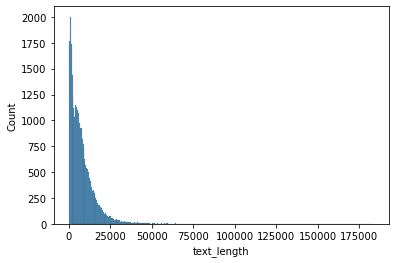

In [44]:
sns.histplot(df_10['text_length'])

### средняя

In [38]:
df_10['text_length'].mean()

7882.958551406793

In [39]:
df_10['text_length'].median()

5792.0

### минимальная

In [40]:
df_10['text_length'].min()

1

### максимальная

In [42]:
df_10['text_length'].max()

183557

## Облако слов

In [57]:
df_10.head(1)

,Title,Author,Publication_date,Hubs,Tags,Content,Comments,Views,URL,Reading_time,Images_links,Individ/Company,Rating,Positive/Negative,Bookmarks_cnt,cleaned_text,text_length,tokens,pos_tags
0,Лечение приступов лени,complex,2009-08-03 14:34:35+00:00,GTD,"лень, учись работать, самомотивация, мотивация",Пора лишать девственности свой бложик. Так как...,67,6800,https://habr.com/ru/articles/66091/,2.0,,individual,4,positive,25.0,пора лишать девственности свой бложик так как ...,2027,['лишать' 'девственность' 'бложик' 'происходит...,"[NOUN, VERB, NOUN, DET, NOUN, ADV, SCONJ, PRON..."


In [58]:
df_10.tokens.iloc[0]

"['лишать' 'девственность' 'бложик' 'происходить' 'сегодня' 'понедельник'\n 'день' 'неделя' 'крокодил' 'ловится' 'расти' 'кокос' 'закину'\n 'соответствующий' 'пост' 'самомотивация' 'период' 'жизнь' 'инициативный'\n 'неугомонный' 'трудоголик' 'смотреть' 'подумаешь' 'периодически'\n 'происходить' 'нападать' 'тотальный' 'апатия' 'лень' 'происходить'\n 'неимение' 'возможность' 'устроить' 'выходной' 'неделя' 'подряд'\n 'происходить' 'избавиться' 'пост' 'написать' 'учись' 'работать'\n 'мотивация' 'заставлять' 'работать' 'избавляться' 'состояние' 'работать'\n 'хотеться' 'человек' 'инициативный' 'неугомонный' 'трудоголик'\n 'гордиться' 'временами' 'день' 'ночь' 'сутками' 'работа' 'работать'\n 'попадать' 'ступор' 'мозг' 'напрочь' 'отказываться' 'чтолибо' 'думать'\n 'соответственно' 'чтото' 'делать' 'получаться' 'плохо' 'голова'\n 'вериться' 'фраза' 'работать' 'делать' 'хотеться' 'озвучить' 'многих'\n 'топика' 'хабре' 'лекарство' 'помогать' 'отключить' 'интернет'\n 'представить' 'миллион' 'зараб

# Анализ атрибутов (связи)

## Распределения

In [45]:
df.head(1)

,title,author,publication_date,hubs,tags,content,comments,views,url,reading_time,images_links,individ/company,rating,positive/negative,bookmarks_cnt,is_individ,is_positive
0,Лечение приступов лени,complex,2009-08-03 14:34:35+00:00,GTD,"лень, учись работать, самомотивация, мотивация",Пора лишать девственности свой бложик.\nТак ка...,67,6800,https://habr.com/ru/articles/66091/,2.0,,individual,4,positive,25.0,1,1


<AxesSubplot:xlabel='bookmarks_cnt', ylabel='Count'>

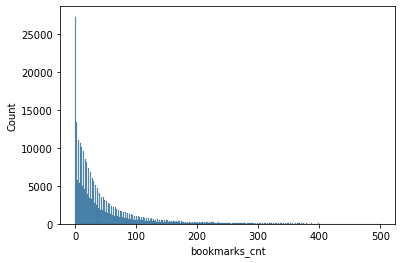

In [46]:
sns.histplot(df.query('bookmarks_cnt < 500')['bookmarks_cnt'])

/Users/vitaly/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating'>

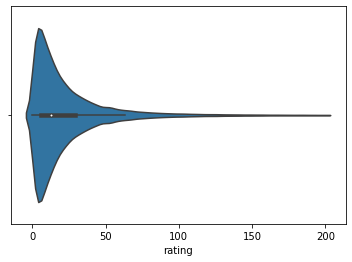

In [47]:
sns.violinplot(df.query('rating < 200')['rating'])

<AxesSubplot:xlabel='reading_time', ylabel='Count'>

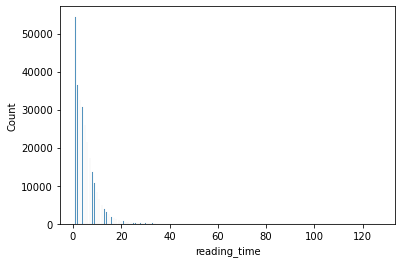

In [48]:
sns.histplot(df['reading_time'])

<AxesSubplot:xlabel='views', ylabel='Count'>

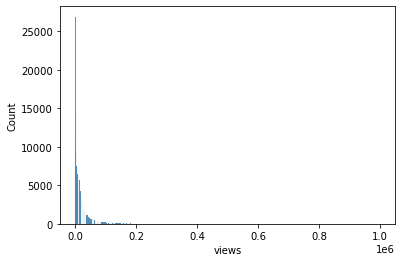

In [49]:
sns.histplot(df['views'])

<AxesSubplot:xlabel='comments', ylabel='Count'>

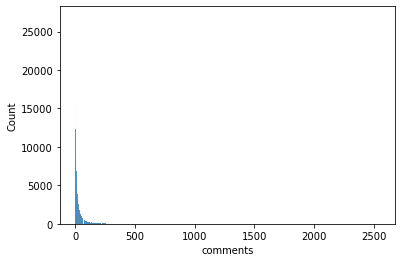

In [50]:
sns.histplot(df['comments'])

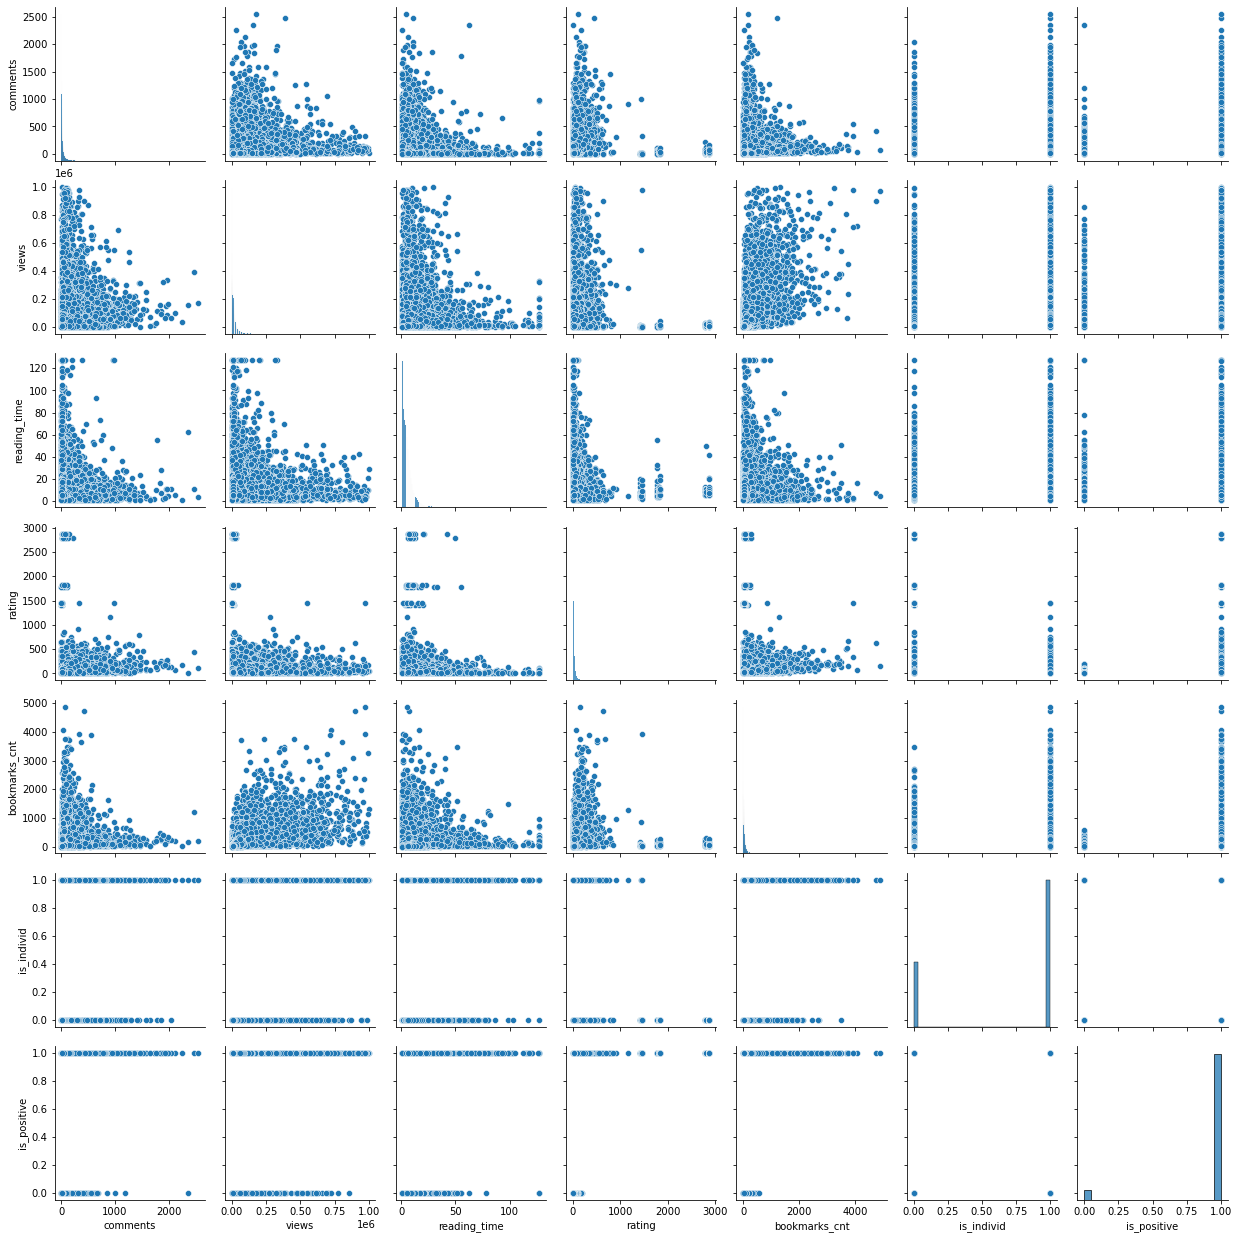

In [51]:
sns.pairplot(df)

In [52]:
df[['bookmarks_cnt', 'rating', 'reading_time', 'views', 'comments']].corr()

,bookmarks_cnt,rating,reading_time,views,comments
bookmarks_cnt,1.000000,0.240125,0.211739,0.655055,0.190889
rating,0.240125,1.000000,0.054705,0.201484,0.296066
reading_time,0.211739,0.054705,1.000000,0.135618,-0.008614
views,0.655055,0.201484,0.135618,1.000000,0.295405
comments,0.190889,0.296066,-0.008614,0.295405,1.000000


статистисчески наблюдается связь между кол-вом просмотров и количеством отметок (закладок) пользователями

## Категориальные признаки, даты

In [53]:
df.head(1)

,title,author,publication_date,hubs,tags,content,comments,views,url,reading_time,images_links,individ/company,rating,positive/negative,bookmarks_cnt,is_individ,is_positive
0,Лечение приступов лени,complex,2009-08-03 14:34:35+00:00,GTD,"лень, учись работать, самомотивация, мотивация",Пора лишать девственности свой бложик.\nТак ка...,67,6800,https://habr.com/ru/articles/66091/,2.0,,individual,4,positive,25.0,1,1


In [54]:
df.groupby('is_positive').agg(mean_comments = ('comments', 'median'),
                              mean_views = ('views', 'median'),
                              mean_reading_time = ('reading_time', 'median'),
                              mean_rating = ('rating', 'median'),
                              mean_bookmarks_cnt = ('bookmarks_cnt', 'median'))
# закономерно у статей с позитивным рейтингом все показатели лучше

,mean_comments,mean_views,mean_reading_time,mean_rating,mean_bookmarks_cnt
is_positive,,,,,
0,10.0,2300.0,2.0,5.0,5.0
1,13.0,8500.0,4.0,14.0,28.0


In [55]:
df.groupby('is_individ').agg(mean_comments = ('comments', 'median'),
                              mean_views = ('views', 'median'),
                              mean_reading_time = ('reading_time', 'median'),
                              mean_rating = ('rating', 'median'),
                              mean_bookmarks_cnt = ('bookmarks_cnt', 'median'))
# у простых авторов больше комментариев, и немного больше рейтинг
# у представителей компаний больше кол-во просмотров, время просмотра и кол-во заметок

,mean_comments,mean_views,mean_reading_time,mean_rating,mean_bookmarks_cnt
is_individ,,,,,
0,7.0,9200.0,6.0,13.0,30.0
1,17.0,7300.0,3.0,14.0,24.0
